<a href="https://colab.research.google.com/github/Quantum-Intelligence-Frontier/dldna/blob/main/notebooks/en/part_1/03_DeepLearningFramework.ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 3. Deep Learning Frameworks

> "A tool is only as good as the person using it." - *Anonymous, often attributed to John von Neumann*

The development of frameworks in the history of deep learning has been crucial. After AlexNet's success in 2012, various frameworks emerged. Through Caffe, Theano, Torch7, and now PyTorch and TensorFlow have become mainstream.

In the early 2010s, deep learning began to show remarkable results in areas such as image recognition and speech recognition, surpassing existing technologies. However, training and deploying deep learning models was still a difficult task. This was because one had to implement neural network configurations, gradient calculations, GPU acceleration, and more directly. Such complexity raised the barrier to entry for deep learning research and slowed down the pace of research. To solve these problems, deep learning frameworks emerged. Deep learning frameworks provided high-level APIs and tools for building, training, and deploying neural network models, simplifying and accelerating the development process. Initially, frameworks like Theano, Caffe, and Torch appeared and were widely used in academia and industry.

In 2015, Google released TensorFlow as an open source, bringing significant changes to the deep learning framework ecosystem. TensorFlow quickly gained popularity due to its flexible architecture, powerful visualization tools, and support for large-scale distributed learning. In 2017, Facebook released PyTorch, setting another important milestone. PyTorch provided dynamic computation graphs, intuitive interfaces, and excellent debugging capabilities, rapidly spreading among researchers.

Currently, deep learning frameworks have established themselves as core infrastructure for deep learning research and development, beyond simple tools. They provide key features such as automatic differentiation, GPU acceleration, model parallelization, and distributed learning, accelerating the development of new models and algorithms. Additionally, competition and cooperation between frameworks are further advancing the deep learning ecosystem.

## 3.1 PyTorch

PyTorch is an open-source machine learning framework based on the Torch library, used for applications such as computer vision and natural language processing. It was developed in 2016 by Facebook's AI Research lab (FAIR) as a reimplementation of Torch7 in Python. Thanks to its dynamic computation graphs and intuitive debugging features, PyTorch quickly gained popularity among researchers. Besides PyTorch, other frameworks like TensorFlow, JAX, and Caffe exist, but PyTorch has become the de facto standard in research. Many new models are often released with PyTorch implementations.

After becoming proficient in one framework, leveraging the strengths of another can be a good strategy. For example, you can use TensorFlow's data preprocessing pipelines or JAX's functional transformation capabilities alongside PyTorch.

In [ ]:
!pip install dldna[colab] # in Colab
# !pip install dldna[all] # in your local

In [1]:
import torch

# Print PyTorch version
print(f"PyTorch version: {torch.__version__}")

# Set the random seed for reproducibility
torch.manual_seed(7)

PyTorch version: 2.6.0+cu124


When generating random numbers, setting the initial seed value allows you to get the same random number every time. This is commonly used in research to ensure consistent results in repetitive training.

### 3.1.1 Tensor Objects

> **Challenge**: How can large-scale matrix operations be performed efficiently using a GPU?
>
> **Researcher's Concern**: As deep learning models grew in size, it took too much time to train and infer using only the CPU. While GPUs were suitable for deep learning due to their specialization in parallel computing, GPU programming was complex and difficult. A tool was needed to abstract and automate GPU operations so that deep learning researchers could easily utilize GPUs.

Tensors are the basic data structure in PyTorch. Since the introduction of CUDA in 2006, GPU operations have become central to deep learning, and tensors were designed to perform these operations efficiently. Tensors are multi-dimensional arrays that generalize scalars, vectors, and matrices. In deep learning, the dimensionality of data (tensor rank) is highly varied. For example, images are represented as 4D tensors (batch, channel, height, width), while natural language is represented as 3D tensors (batch, sequence length, embedding dimension). As seen in Chapter 2, it is crucial to freely transform and process these dimensions.

Tensors can be declared as follows:

In [2]:
import numpy as np
import torch

# Create a 3x2x4 tensor with random values
a = torch.Tensor(3, 2, 4)
print(a)

tensor([[[ 1.1210e-44,  0.0000e+00,  0.0000e+00,  4.1369e-41],
         [ 1.8796e-17,  0.0000e+00,  2.8026e-45,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,         nan,         nan],
         [ 6.3058e-44,  4.7424e+30,  1.4013e-45,  1.3563e-19]],

        [[ 1.0089e-43,  0.0000e+00,  1.1210e-44,  0.0000e+00],
         [-8.8105e+09,  4.1369e-41,  1.8796e-17,  0.0000e+00]]])


Tensors can also be initialized from existing data.

In [4]:
# From a Python list
d = [[1, 2], [3, 4]]
print(f"Type of d: {type(d)}")

a = torch.Tensor(d)  # Creates a *copy*
print(f"Tensor a:\n{a}")
print(f"Type of a: {type(a)}")

# From a NumPy array
d_np = np.array(d)
print(f"Type of d_np: {type(d_np)}")

b = torch.from_numpy(d_np) # Shares memory with d_np (zero-copy)
print(f"Tensor b (from_numpy):\n{b}")


c = torch.Tensor(d_np)  # Creates a *copy*
print(f"Tensor c (from np array using torch.Tensor):\n{c}")

# Example of memory sharing with torch.from_numpy
d_np[0, 0] = 100
print(f"Modified d_np:\n{d_np}")
print(f"Tensor b (from_numpy) after modifying d_np:\n{b}")
print(f"Tensor c (copy) after modifying d_np:\n{c}")

Type of d: <class 'list'>
Tensor a:
tensor([[1., 2.],
        [3., 4.]])
Type of a: <class 'torch.Tensor'>
Type of d_np: <class 'numpy.ndarray'>
Tensor b (from_numpy):
tensor([[1, 2],
        [3, 4]])
Tensor c (from np array using torch.Tensor):
tensor([[1., 2.],
        [3., 4.]])
Modified d_np:
[[100   2]
 [  3   4]]
Tensor b (from_numpy) after modifying d_np:
tensor([[100,   2],
        [  3,   4]])
Tensor c (copy) after modifying d_np:
tensor([[1., 2.],
        [3., 4.]])


Just because they look the same when outputted does not mean they are the same object. `d` is a Python list object, and tensors can be created from various data structures. In particular, interactions with NumPy arrays are very efficient. However, since list objects and NumPy arrays do not support GPUs, conversion to tensors is essential for large operations. The *important* point is to understand the difference between `torch.Tensor(data)` and `torch.from_numpy(data)`. The former always creates a copy, while the latter creates a *view* that shares memory with the original NumPy array (if possible - zero-copy). If you modify the NumPy array, the tensor created by `from_numpy` will also change, and vice versa.

There are many ways to initialize tensors. Since Hinton's 2006 paper, the importance of initialization methods has been highlighted, and various initialization strategies have been developed. The most basic initialization functions are as follows.

| Function | Description |
| --- | --- |
| `torch.zeros` | Initializes with 0. |
| `torch.ones` | Initializes with 1. |
| `torch.rand` | Initializes with random numbers from a uniform distribution between 0 and 1. |
| `torch.randn` | Initializes with random numbers from a standard normal distribution (mean 0, variance 1). |
| `torch.arange` | Initializes sequentially, such as n, n+1, n+2, ... .

In [5]:
shape = (2, 3)

rand_t = torch.rand(shape)     # Uniform distribution [0, 1)
randn_t = torch.randn(shape)   # Standard normal distribution
ones_t = torch.ones(shape)
zeros_t = torch.zeros(shape)

print(f"Random tensor (uniform):\n{rand_t}")
print(f"Random tensor (normal):\n{randn_t}")
print(f"Ones tensor:\n{ones_t}")
print(f"Zeros tensor:\n{zeros_t}")

Random tensor (uniform):
tensor([[0.5349, 0.1988, 0.6592],
        [0.6569, 0.2328, 0.4251]])
Random tensor (normal):
tensor([[-1.2514, -1.8841,  0.4457],
        [-0.7068, -1.5750, -0.6318]])
Ones tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Zeros tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.]])


PyTorch supports over 100 tensor operations, all of which can be run on the GPU. Tensors are created on the CPU by default, so to use the GPU, you must explicitly move them using the `to()` function. Moving large tensors across CPU and GPU is costly, so careful memory management is essential. In real deep learning training, the memory bandwidth of the GPU has a decisive impact on performance. For example, when training transformer models, the larger the GPU memory, the larger the batch size that can be used, which increases training efficiency. However, high-bandwidth memory is very expensive to produce and accounts for a significant portion of the cost of GPUs. The performance difference between CPU and GPU tensor operations is particularly noticeable in operations that can be parallelized, such as matrix multiplication. For this reason, dedicated accelerators like GPUs, TPUs, and NPUs are essential in modern deep learning.

In [6]:
# Device setting
if torch.cuda.is_available():
    tensor = zeros_t.to("cuda")
    device = "cuda:0"
else:
    device = "cpu"
    print('GPU not available')

# CPU/GPU performance comparison
import time

# CPU operation
x = torch.rand(10000, 10000)
start = time.time()
torch.matmul(x, x)
cpu_time = time.time() - start
print(f"CPU computation time = {cpu_time:3.2f} seconds")

# GPU operation
if device != "cpu":
    x = x.to(device)
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)

    start.record()
    torch.matmul(x, x)
    end.record()
    torch.cuda.synchronize()  # Wait for all operations to complete
    gpu_time = start.elapsed_time(end) / 1000  # Convert milliseconds to seconds
    print(f"GPU computation time = {gpu_time:3.2f} seconds")
    print(f"GPU is {cpu_time / gpu_time:3.1f} times faster.")

CPU computation time = 2.34 seconds
GPU computation time = 0.14 seconds
GPU is 16.2 times faster.


The conversion between NumPy and tensors is implemented very efficiently, especially as seen above, using `torch.from_numpy()`, memory is shared without memory copy.

In [7]:
np_a = np.array([[1, 1], [2, 3]])
tensor_a = torch.from_numpy(np_a)
np_b = tensor_a.numpy() # Shares memory.  If tensor_a is on CPU.

print(f"NumPy array: {np_a}")
print(f"Tensor: {tensor_a}")
print(f"NumPy array from Tensor: {np_b}") #if tensor_a is on CPU.

NumPy array: [[1 1]
 [2 3]]
Tensor: tensor([[1, 1],
        [2, 3]])
NumPy array from Tensor: [[1 1]
 [2 3]]


When converting a tensor to NumPy, the tensor must be on the CPU. Tensors on the GPU must first be moved to the CPU using `.cpu()`. The basic properties of a tensor are `shape`, `dtype`, `device`, which can be used to check the shape and storage location of the tensor.

In [18]:
a = torch.rand(2, 3)
print(f"Shape = {a.shape}")
print(f"Data type = {a.dtype}")
print(f"Device = {a.device}")

Shape = torch.Size([2, 3])
Data type = torch.float32
Device = cpu


Indexing and slicing use the same syntax as NumPy.

In [19]:
a = torch.rand(3, 3)
print(f"Tensor a:\n{a}")
print(f"First row: {a[0]}")
print(f"First column: {a[:, 0]}")
print(f"Last column: {a[..., -1]}")  # Equivalent to a[:, -1]

Tensor a:
tensor([[0.2069, 0.8296, 0.4973],
        [0.9265, 0.8386, 0.6611],
        [0.5329, 0.7822, 0.0975]])
First row: tensor([0.2069, 0.8296, 0.4973])
First column: tensor([0.2069, 0.9265, 0.5329])
Last column: tensor([0.4973, 0.6611, 0.0975])


### 3.1.2 Operation

PyTorch supports almost all operations of NumPy. The tradition of multidimensional array operations that started from the APL language in 1964 has been passed down to PyTorch through NumPy. You can check the list of all supported operations on the official PyTorch documentation ([PyTorch documentation](https://pytorch.org/docs/stable/tensors.html)).

Changing the shape of a tensor is one of the most frequently used operations in neural networks. The `view()` function can change the dimension of a tensor, and at this time, the total number of elements must be maintained. The `permute()` function rearranges the order of dimensions.

In [20]:
a = torch.arange(12)
print(f"a: {a}")

x = a.view(3, 4)  # Reshape to 3x4
print(f"x: {x}")

y = x.permute(1, 0)  # Swap dimensions 0 and 1
print(f"y: {y}")

b = torch.randn(2, 3, 5)
print(f"b shape: {b.shape}")

z = b.permute(2, 0, 1)  # Change dimension order to (2, 0, 1)
print(f"z shape: {z.shape}")

a: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
x: tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
y: tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])
b shape: torch.Size([2, 3, 5])
z shape: torch.Size([5, 2, 3])


Matrix operations are the core of deep learning, and PyTorch provides various matrix operation functions.

1.  `torch.matmul`: Performs general matrix operations, which behave as follows depending on the dimensions:
    *   1D × 1D: dot product
    *   2D × 2D: matrix product
    *   1D × 2D: matrix product after adding a dimension of size one to the first tensor
    *   N-D × M-D: matrix product after broadcasting
2.  `torch.mm`: Pure matrix multiplication operation (no broadcasting support)
3.  `torch.bmm`: Batch matrix multiplication ((b, i, k) × (b, k, j) → (b, i, j))
4.  `torch.einsum`: Tensor operations using Einstein summation notation, allowing for concise expression of complex tensor operations. (See "Theory Deep Dive" for details)
    -   `torch.einsum('ij,jk->ik', a, b)`: Product of matrices a and b

In [21]:
a = torch.arange(6)
b = torch.arange(12)

X = a.view(2, 3)
Y = b.view(3, 4)
print(f"X: {X}")
print(f"Y: {Y}")

# matmul (2,3) X (3,4) -> (2, 4)
print(f"X @ Y = {torch.matmul(X, Y)}")

# Using torch.einsum for matrix multiplication
einsum_result = torch.einsum('ij,jk->ik', X, Y)
print(f"X @ Y (using einsum) = {einsum_result}")


a = torch.arange(2)
b = torch.arange(2)
print(f"a: {a}")
print(f"b: {b}")

# Vector x Vector operation
print(f"a @ b = {torch.matmul(a, b)}")

# 1D tensor (vector), 2D tensor (matrix) operation
# (2) x (2,2) is treated as (1,2) x (2,2) for matrix multiplication.
# Result: (1,2) x (2,2) -> (1,2)
b = torch.arange(4)
B = b.view(2, 2)
print(f"a: {a}")
print(f"B: {B}")
print(f"a @ B = {torch.matmul(a, B)}")

# Matrix x Vector operation
X = torch.randn(3, 4)
b = torch.randn(4)
print(f"X @ b shape = {torch.matmul(X, b).size()}")

# Batched matrix x Batched matrix
# The leading batch dimension is maintained.
# The 2nd and 3rd dimensions are treated as matrices for multiplication.
X = torch.arange(18).view(3, 2, 3)
Y = torch.arange(18).view(3, 3, 2)
print(f"X: {X}")
print(f"Y: {Y}")
# Batch dimension remains the same, and (2,3)x(3,2) -> (2,2)
print(f"X @ Y shape: {torch.matmul(X, Y).size()}")
print(f"X @ Y: {torch.matmul(X, Y)}")

# Batched matrix x Broadcasted matrix
X = torch.arange(18).view(3, 2, 3)
Y = torch.arange(6).view(3, 2)
print(f"X: {X}")
print(f"Y: {Y}")
# The second matrix lacks a batch dimension.
# It's broadcasted to match the batch dimension of the first matrix (repeated 3 times).
print(f"X @ Y shape: {torch.matmul(X, Y).size()}")
print(f"X @ Y: {torch.matmul(X, Y)}")


# Using torch.einsum for matrix multiplication
X = torch.arange(6).view(2, 3)
Y = torch.arange(12).view(3, 4)
einsum_result = torch.einsum('ij,jk->ik', X, Y)  # Equivalent to torch.matmul(X, Y)
print(f"X @ Y (using einsum) = {einsum_result}")

X: tensor([[0, 1, 2],
        [3, 4, 5]])
Y: tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
X @ Y = tensor([[20, 23, 26, 29],
        [56, 68, 80, 92]])
X @ Y (using einsum) = tensor([[20, 23, 26, 29],
        [56, 68, 80, 92]])
a: tensor([0, 1])
b: tensor([0, 1])
a @ b = 1
a: tensor([0, 1])
B: tensor([[0, 1],
        [2, 3]])
a @ B = tensor([2, 3])
X @ b shape = torch.Size([3])
X: tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])
Y: tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])
X @ Y shape: torch.Size([3, 2, 2])
X @ Y: tensor([[[ 10,  13],
         [ 28,  40]],

        [[172, 193],
         [244, 274]],

        [[550, 589],
         [676, 724]]])
X: tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 

torch.einsum uses Einstein notation to express tensor operations. `'ij,jk->ik'` means multiply the `(i, j)` dimensions of `X` tensor and `(j, k)` dimensions of `Y` tensor to produce `(i, k)` dimensional result. This is equivalent to matrix multiplication `torch.matmul(X, Y)`. einsum also supports various operations such as transpose, sum, inner product, outer product, batch matrix multiplication, etc. For more details, please refer to the PyTorch documentation.

In [22]:
# Other einsum examples

# Transpose
a = torch.randn(2, 3)
b = torch.einsum('ij->ji', a)  # Swap dimensions

# Sum of all elements
a = torch.randn(2, 3)
b = torch.einsum('ij->', a)  # Sum all elements

# Batch matrix multiplication
a = torch.randn(3, 2, 5)
b = torch.randn(3, 5, 3)
c = torch.einsum('bij,bjk->bik', a, b) # Batch matrix multiplication

::: {.callout-note collapse="true" title="Click to view contents (Deep Dive: Einstein Notation and torch.einsum)"}
## Einstein Notation and torch.einsum

### Einstein Notation

Einstein notation, or Einstein summation convention, is a notation introduced by Albert Einstein in 1916 to describe the theory of general relativity. Originally designed to concisely express physical equations, especially those related to relativity, its convenience and expressive power have made it widely used in various fields that deal with tensor operations.

**Key Ideas:**

* **Repeating indices implies summation:** If an index appears twice in a single term, it implies summation over all possible values of that index. This allows for the omission of explicit summation symbols ($\sum$), making notation more concise.
* **Free and dummy indices:**
    * **Free index:** An index that appears in the resulting tensor, appearing only once in each term.
    * **Dummy index (or bound index):** An index that is summed over, appearing twice in a single term.

**Basic Rules**

1.  **If an index appears twice in a term, it is summed over.**
2.  **Free indices determine the dimension of the resulting tensor.**
3.  **Dummy indices are used only for internal calculations and do not appear in the result.**
4.  **Index letters can be chosen arbitrarily but should be consistent to avoid confusion.** (Conventions often use $i, j, k, l, m, n$, etc.)
5.  **The left side of an arrow ($\rightarrow$)** represents input tensors, and **the right side** represents output tensors.

**Examples**

*   **Dot product:** $a_i b_i$ (equivalent to $\sum_i a_i b_i$)
*   **Matrix multiplication:** $A_{ij} B_{jk} = C_{ik}$ (equivalent to $\sum_j A_{ij}B_{jk}$)
*   **Transpose:** $A_{ij} = B_{ji}$ ($B$ is the transpose of $A$)
*   **Trace:** $A_{ii}$ (equivalent to $\sum_i A_{ii}$)
*   **Outer product:** $a_i b_j = C_{ij}$
*   **Element-wise multiplication (Hadamard product):** $A_{ij}B_{ij} = C_{ij}$

**Examples of Use in Deep Learning**
* **Batched Matrix Multiplication:** $A\_{bij} B\_{bjk} = C\_{bik}$ ($b$: batch dimension)
* **Attention Mechanism:** $e\_{ij} = Q\_{ik} K\_{jk}$, $a\_{ij} = \text{softmax}(e\_{ij})$, $v\_{i} = a\_{ij} V\_{j}$ ($Q$: query, $K$: key, $V$: value)
* **Bilinear Transformation:** $x\_i W\_{ijk} y\_j = z\_k$
* **Multi-Dimensional Convolution:** $I\_{b,c,i,j} \* F\_{o,c,k,l} = O\_{b,o,i',j'}$ ($b$: batch, $c$: input channel, $o$: output channel, $i, j$: input spatial dimension, $k, l$: filter spatial dimension)
* **Batch Normalization:** $\gamma\_c \* \frac{x\_{b,c,h,w} - \mu\_c}{\sigma\_c} + \beta\_c$ ($c$: channel dimension, $b$: batch, $h$: height, $w$: width)
* **RNN Hidden State Update:** $h\_t = \tanh(W\_{ih}x\_t + b\_{ih} + W\_{hh}h\_{t-1} + b\_{hh})$ ($h$: hidden, $x$: input, $W$: weight, $b$: bias)
* **LSTM Cell State Update:** $c\_t = f\_t \* c\_{t-1} + i\_t \* \tilde{c}\_t$ ($c$: cell state, $f$: forget gate, $i$: input gate, $\tilde{c}\_t$: candidate cell state)

### torch.einsum

`torch.einsum` is a PyTorch function that performs tensor operations using Einstein notation. `einsum` is short for "Einstein summation".

**Usage:**

```python
torch.einsum(equation, *operands)
```

* `equation`: Einstein notation string, e.g., `'ij,jk->ik'`.
* `*operands`: Tensors participating in the operation (variable number of arguments).

**Advantages**

* **Conciseness:** Complex tensor operations can be expressed in a single line of code.
* **Readability:** Einstein notation clearly conveys the meaning of tensor operations.
* **Flexibility:** Various tensor operations can be combined to define new operations easily.
* **Optimization:** PyTorch automatically optimizes `einsum` operations for efficient computation. (In some cases) It can be faster than manual implementation by utilizing optimized routines from libraries like BLAS, cuBLAS, or optimizing operation order.
* **Autograd Support:** Operations defined with `einsum` are fully compatible with PyTorch's autograd system.

**torch.einsum Examples:**

```python
import torch

# Matrix Multiplication
A = torch.randn(3, 4)
B = torch.randn(4, 5)
C = torch.einsum('ij,jk->ik', A, B)  # C = A @ B

# Transpose
A = torch.randn(3, 4)
B = torch.einsum('ij->ji', A)  # B = A.T

# Trace
A = torch.randn(3, 3)
trace = torch.einsum('ii->', A)  # trace = torch.trace(A)
```
# Batch Matrix Multiplication
A = torch.randn(2, 3, 4)
B = torch.randn(2, 4, 5)
C = torch.einsum('bij,bjk->bik', A, B) # C = torch.bmm(A, B)

# Outer Product
a = torch.randn(3)
b = torch.randn(4)
C = torch.einsum('i,j->ij', a, b) # C = torch.outer(a, b)

# Element-wise Multiplication
A = torch.randn(2,3)
B = torch.randn(2,3)
C = torch.einsum('ij,ij->ij', A, B) # C = A * B

# Biliner Transformation
x = torch.randn(3)
W = torch.randn(5, 3, 4)
y = torch.randn(4)
z = torch.einsum('i,ijk,j->k', x, W, y) # z_k = sum_i sum_j x_i * W_{ijk} * y_j

# Multidimensional Tensor Contraction
tensor = torch.randn(3, 4, 5, 6)
result = torch.einsum('...ij->...i', tensor)  # sum over the last two dimensions

**`torch.einsum` vs. Other Operations:**

| Operation                    | `torch.einsum`           | Other Methods                                   |
| :---------------------- | :----------------------- | :------------------------------------------ |
| Matrix Multiplication                | `'ij,jk->ik'`           | `torch.matmul(A, B)` or `A @ B`          |
| Transpose                    | `'ij->ji'`           | `torch.transpose(A, 0, 1)` or `A.T`        |
| Trace                        | `'ii->'`              | `torch.trace(A)`                            |
| Batch Matrix Multiplication            | `'bij,bjk->bik'`        | `torch.bmm(A, B)`                           |
| Dot Product                    | `'i,i->'`              | `torch.dot(a, b)`                            |
| Outer Product                    | `'i,j->ij'`           | `torch.outer(a, b)`                          |
| Element-wise Multiplication                | `'ij,ij->ij'`          | `A * B`                                      |
| Tensor Contraction (sum, mean, etc.) | `'ijk->i'` (example)      | `torch.sum(A, dim=(1, 2))`                   |

**Limitations of `torch.einsum`**

  * **Initial Learning Curve:** May be difficult for users unfamiliar with Einstein notation at first.
  * **Readability of Complex Operations:** For very complex operations, the `einsum` string can become long and decrease readability. In such cases, breaking down the operation into multiple steps or using comments is recommended.
  * **Inability to Express All Operations:** Since `einsum` is based on linear algebra operations, non-linear operations (e.g., `max`, `min`, `sort`) or conditional operations cannot be directly expressed. In such cases, other PyTorch functions must be used in conjunction.

**Optimizing `einsum` with `torch.compile`**
`torch.compile` (PyTorch 2.0 and above) can further optimize `einsum` operations. `compile` performs various optimizations, such as analyzing code through JIT (Just-In-Time) compilation, merging tensor operations, or optimizing memory access patterns.

```python
import torch
# Available in PyTorch 2.0 and above

@torch.compile
def my_einsum_function(a, b):
    return torch.einsum('ij,jk->ik', a, b)

# Compile on the first call, execute optimized code on subsequent calls
result = my_einsum_function(torch.randn(10, 20), torch.randn(20, 30))
```

**Conclusion:**

Einstein notation and `torch.einsum` are powerful tools for expressing and calculating complex tensor operations in deep learning in a concise and efficient manner. Although they may seem unfamiliar at first, they can greatly improve code readability and efficiency once you get used to them. Especially when dealing with deep learning models that involve complex tensor operations, such as transformer models, they show their value. Using `torch.compile` together can further enhance performance.

**References:**

1.  **Einstein Notation:** https://en.wikipedia.org/wiki/Einstein_notation
2.  **`torch.einsum` documentation:** https://pytorch.org/docs/stable/generated/torch.einsum.html
3.  **A basic introduction to NumPy's einsum:** https://ajcr.net/Basic-guide-to-einsum/
4.  **Einsum is All You Need - Einstein Summation in Deep Learning:** https://rockt.github.io/2018/04/30/einsum
:::

### 3.1.3 Computational Graph for Gradient Operations

Automatic Differentiation has been studied since the 1970s, but it has gained significant attention along with the development of deep learning since 2015. PyTorch implements automatic differentiation through a dynamic computation graph, which is an actual implementation of the chain rule discussed in Chapter 2.

PyTorch's automatic differentiation can track and store gradients at each operation step. To do this, gradient tracking must be explicitly declared for tensors.

In [23]:
a = torch.randn((2,))
print(f"a.requires_grad (default): {a.requires_grad}")  # False (default)

a.requires_grad_(True)  # In-place modification
print(f"a.requires_grad (after setting to True): {a.requires_grad}")  # True

# Declare during creation
x = torch.arange(2, dtype=torch.float32, requires_grad=True)
print(f"x.requires_grad (declared at creation): {x.requires_grad}")

a.requires_grad (default): False
a.requires_grad (after setting to True): True
x.requires_grad (declared at creation): True


For example, let's consider a simple loss function as follows (refer to Figure 3-1, previous version).

$$y = \frac {1}{N}\displaystyle\sum_{i}^{N} \{(x_i - 1)^2 + 4) \}$$

The operation for $x_i$ can be expressed sequentially as $a_i = x_i - 1$, $b_i = a_i^2$, $c_i = b_i + 4$, $y = \frac{1}{N}\sum_{i=1}^{N} c_i$. 

Let's perform forward and backward operations on this equation.

In [24]:
a = x - 1
b = a**2
c = b + 4
y = c.mean()

print(f"y = {y}")

# Perform backward operation
y.backward()

# Print the gradient of x (x.grad)
print(f"x.grad = {x.grad}")

y = 4.5
x.grad = tensor([-1.,  0.])


The gradient of each step can be calculated as follows:

$\frac{\partial a_i}{\partial x_i} = 1, \frac{\partial b_i}{\partial a_i} = 2 \cdot a_i, \frac{\partial c_i}{\partial b_i} = 1,  \frac{\partial y}{\partial c_i} = \frac{1}{N}$

Therefore, by the chain rule,

$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial  c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i} =  \frac{1}{N} \cdot 1 \cdot 2 \cdot a_i \cdot 1 = \frac{2}{N}a_i = \frac{2}{N}(x_i - 1)$

Since $x_i$ is in [0, 1] and N=2 (the number of elements in x), $\frac{\partial y}{\partial x_i}$ becomes $[-0.5, 0.5]$. This matches the result of PyTorch's automatic differentiation.

PyTorch has implemented the concept of automatic differentiation, which has been studied since the 1970s, in a modern way. In particular, the dynamic creation of computation graphs and gradient tracking functions are very useful. However, sometimes it is necessary to disable these automatic differentiation functions.

In [8]:
x = torch.randn(3, 4)
w = torch.randn(4, 2)
b = torch.randn(2)

# If gradient tracking is needed
z = torch.matmul(x, w) + b
z.requires_grad_(True)  # Can also be set using requires_grad_()
print(f"z.requires_grad: {z.requires_grad}")

# Disable gradient tracking method 1: Using 'with' statement
with torch.no_grad():
    z = torch.matmul(x, w) + b
    print(f"z.requires_grad (inside no_grad): {z.requires_grad}")

# Disable gradient tracking method 2: Using detach()
z_det = z.detach()
print(f"z_det.requires_grad: {z_det.requires_grad}")

z.requires_grad: True
z.requires_grad (inside no_grad): False
z_det.requires_grad: False


Disabling gradient tracking is particularly useful in the following cases:

1.  **During inference**: When only the forward pass is needed, it saves memory and computation cost.
2.  **Fine-tuning**: When updating specific parameters and keeping the rest fixed.
3.  **Performance optimization**: Backpropagation incurs additional memory and computation costs, so disabling it when not necessary.

Especially in fine-tuning large language models, where most parameters are typically frozen and only a few are updated, selective activation of gradient tracking is a crucial feature.

### 3.1.4 Data Loading

Data loading is a core element of deep learning. Until the early 2000s, each research team used its own data processing method, but with the emergence of large datasets like ImageNet in 2009, the need for standardized data loading systems became prominent.

PyTorch provides two key classes to separate data processing and training logic:

1.  `torch.utils.data.Dataset`: Provides a consistent access interface for data and labels. You must implement the `__len__` and `__getitem__` methods.
2.  `torch.utils.data.DataLoader`: Offers an efficient data loading mechanism in batch units. It wraps around `Dataset` to automate mini-batch creation, shuffling, and parallel data loading.

The following is an example of generating random data using the Dirichlet distribution.

In [9]:
import torch.utils.data as data
import numpy as np

# Initialize with Dirichlet distribution
a = np.random.dirichlet(np.ones(5), size=2)
b = np.zeros_like(a)
# Generate label values
b = (a == a.max(axis=1)[:, None]).astype(int)

print(f"Data (a):\n{a}")
print(f"Labels (b):\n{b}")


# Create a custom Dataset class by inheriting from PyTorch's Dataset.
class RandomData(data.Dataset):
    def __init__(self, feature, length):
        super().__init__()
        self.feature = feature
        self.length = length
        self.generate_data()

    def generate_data(self):
        x = np.random.dirichlet(np.ones(self.feature), size=self.length)
        y = (x == x.max(axis=1)[:, None]).astype(int)  # One-hot encoding

        self.data = x  # numpy object
        self.label = y

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        # Return data and label as torch tensors
        return torch.tensor(self.data[index], dtype=torch.float32), torch.tensor(self.label[index], dtype=torch.int64)


dataset = RandomData(feature=10, length=100)
print(f"Number of data samples = {len(dataset)}")
print(f"Data at index 0 = {dataset[0]}")
print(f"Data type = {type(dataset[0][0])}")

Data (a):
[[0.46073711 0.01119455 0.28991657 0.11259078 0.12556099]
 [0.07331166 0.43554042 0.1243009  0.13339224 0.23345478]]
Labels (b):
[[1 0 0 0 0]
 [0 1 0 0 0]]
Number of data samples = 100
Data at index 0 = (tensor([1.4867e-01, 1.6088e-01, 1.2207e-02, 3.6049e-02, 1.1054e-04, 8.1160e-02,
        2.9811e-02, 1.9398e-01, 4.9448e-02, 2.8769e-01]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]))
Data type = <class 'torch.Tensor'>


`DataLoader` provides various features for batch processing. The main parameters are as follows.

*   `batch_size`: number of samples per batch
*   `shuffle`: randomize data order (generally set to `True` during training)
*   `num_workers`: number of processes for parallelizing data loading
*   `drop_last`: whether to drop the last incomplete batch (if `True`, it is discarded)

It reads data from a `Dataset` using `__getitem__` and converts the result into tensor objects. In particular, setting `num_workers` is important when handling large image or video datasets. However, for small datasets, a single process may be more efficient. Setting `num_workers` too high can lead to overhead, so it's crucial to find an appropriate value (typically trying the number of cores or twice the number of cores).

In [10]:
data_loader = data.DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0)

# Read one batch.
train_x, train_y = next(iter(data_loader))

print(f"1st batch training data = {train_x}, \n Data shape = {train_x.shape}")
print(f"1st batch label data = {train_y}, \n Data shape = {train_y.shape}")
print(f"1st batch label data type = {type(train_y)}")

1st batch training data = tensor([[3.3120e-02, 1.4274e-01, 9.7984e-02, 1.9628e-03, 6.8926e-02, 3.4525e-01,
         4.6966e-02, 6.0947e-02, 4.2738e-02, 1.5937e-01],
        [8.0707e-02, 4.9181e-02, 3.1863e-02, 1.4238e-02, 1.6089e-02, 1.7980e-01,
         1.7544e-01, 1.3465e-01, 1.6361e-01, 1.5442e-01],
        [4.2364e-02, 3.3635e-02, 2.0840e-01, 1.6919e-02, 4.5977e-02, 6.5791e-02,
         1.8726e-01, 1.0325e-01, 2.2029e-01, 7.6117e-02],
        [1.4867e-01, 1.6088e-01, 1.2207e-02, 3.6049e-02, 1.1054e-04, 8.1160e-02,
         2.9811e-02, 1.9398e-01, 4.9448e-02, 2.8769e-01]]), 
 Data shape = torch.Size([4, 10])
1st batch label data = tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]), 
 Data shape = torch.Size([4, 10])
1st batch label data type = <class 'torch.Tensor'>


PyTorch provides specialized packages for domain-specific data processing. Since 2016, as deep learning has expanded to various fields, the need for specialized data processing for each domain has emerged.

*   `torchvision`: computer vision
*   `torchaudio`: audio processing
*   `torchtext`: natural language processing

Fashion-MNIST is a dataset released by Zalando Research in 2017, designed to replace MNIST. The composition of the dataset is as follows.

| Category | Description |
| --- | --- |
| Training data | 60,000 |
| Test data | 10,000 |
| Image size | 28x28 grayscale |

Train data mean: tensor([0.2860]), std: tensor([0.3530])
Label: 5
Label map: Sandal


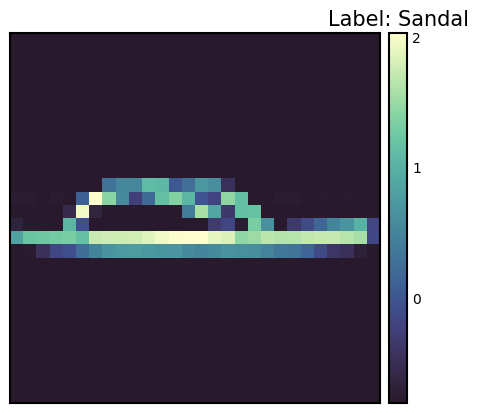

In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize, Compose
import seaborn_image as isns
import matplotlib.pyplot as plt # Added for visualization


# Function to calculate mean and std of the dataset
def calculate_mean_std(dataset):
    dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=False)
    data, _ = next(iter(dataloader))
    mean = data.mean(axis=(0, 2, 3))  # Calculate mean across channel dimension
    std = data.std(axis=(0, 2, 3))    # Calculate std across channel dimension
    return mean, std


# Datasets.  Note:  We *don't* apply Normalize here yet.
train_dataset = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=ToTensor()
)
test_dataset = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=ToTensor()
)

# Calculate mean and std for normalization
train_mean, train_std = calculate_mean_std(train_dataset)
print(f"Train data mean: {train_mean}, std: {train_std}")

# Now define transforms *with* normalization
transform = Compose([
    ToTensor(),
    Normalize(train_mean, train_std)  # Use calculated mean and std
])

# Re-create datasets with the normalization transform
train_dataset = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=transform
)
test_dataset = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=transform
)


# Check one training data sample.
sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
img, label = train_dataset[sample_idx]  # Use a random index

print(f"Label: {label}")

# Manually create a label map
labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

print(f"Label map: {labels_map[label]}")

# Plot using seaborn-image.
isns.imgplot(img.squeeze())  # Squeeze to remove channel dimension for grayscale
plt.title(f"Label: {labels_map[label]}") # Add title to plot
plt.show()


# Define data loaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False) # No need to shuffle test data


### 3.1.5 Data Transform

Data Transform is a very important preprocessing step in deep learning. After the success of AlexNet in 2012, Data Augmentation became a key factor in improving model performance. PyTorch provides various tools for such transformations. Using `transforms.Compose`, multiple transformations can be applied sequentially. Additionally, custom transformations can be easily implemented through the `Lambda` function.

Data transformation is very important for improving the generalization performance of models. Especially in the field of computer vision, data augmentation through various transformations has become a standard practice. The `Normalize` transformation is an essential step to standardize the data for stable model learning.

To apply the `Normalize` transformation, you need to know the mean and standard deviation of the dataset. The code to calculate this is as follows.

In [12]:
from torchvision import transforms
import PIL
import torch
from torch.utils.data import DataLoader
from torchvision import datasets

# Calculate mean and std of the dataset
def calculate_mean_std(dataset):
    dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=False) # Load all data at once
    data, _ = next(iter(dataloader))
    # For grayscale images, calculate mean and std over height, width dimensions (0, 2, 3)
    # For RGB images, the calculation would be over (0, 1, 2)
    mean = data.mean(dim=(0, 2, 3))  # Calculate mean across batch and spatial dimensions
    std = data.std(dim=(0, 2, 3))    # Calculate std across batch and spatial dimensions
    return mean, std

# --- Example usage with FashionMNIST ---
# 1.  Create dataset *without* normalization first:
train_dataset_for_calc = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=transforms.ToTensor()  # Only ToTensor
)

# 2. Calculate mean and std:
train_mean, train_std = calculate_mean_std(train_dataset_for_calc)
print(f"Train data mean: {train_mean}, std: {train_std}")


# 3.  *Now* create the dataset with normalization:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(train_mean, train_std)  # Use calculated mean and std
])

# Example of defining a custom transform using Lambda
def crop_image(image: PIL.Image.Image) -> PIL.Image.Image:
    # Original image is assumed to be 28x28.
    left, top, width, height = 5, 5, 18, 18 # Example crop parameters
    return transforms.functional.crop(image, top=top, left=left, width=width, height=height)

# Compose transforms, including the custom one and normalization.
transform_with_crop = transforms.Compose([
    transforms.Lambda(crop_image), # Custom cropping
    transforms.ColorJitter(),
    transforms.RandomInvert(),
    transforms.ToTensor(), # Must be *before* Normalize
    transforms.Normalize(train_mean, train_std) # Use calculated mean and std
])

train_dataset_transformed = datasets.FashionMNIST(root="data", train=True, download=True, transform=transform_with_crop)
# Get one sample to check the transformation.
sample_img, sample_label = train_dataset_transformed[0]
print(f"Transformed image shape: {sample_img.shape}")
print(f"Transformed image min/max: {sample_img.min()}, {sample_img.max()}") # Check normalization

Train data mean: tensor([0.2860]), std: tensor([0.3530])
Transformed image shape: torch.Size([1, 18, 18])
Transformed image min/max: -0.8102576732635498, 2.022408962249756


In the above code, we first create a dataset with only `ToTensor()` transformation applied and calculate the mean and standard deviation. Then, we define the final transformation including `Normalize` transformation using the calculated values. The example also includes adding a custom `crop_image` function to the transformation pipeline using `Lambda` function. `ToTensor()` should come before `Normalize`. `ToTensor()` converts images in the range of [0, 255] to tensors in the range of [0, 1], and `Normalize` normalizes this [0, 1] range data to have a mean of 0 and a standard deviation of 1. It is common to apply data augmentation only to the training data and not to the validation/test data.

### 3.1.6 Model

The implementation method of neural network models has developed in various ways since the 1980s. PyTorch adopted an object-oriented model implementation method from its release in 2016, which is implemented through `nn.Module`. This method greatly improved the reusability and extensibility of the model.

The model class is implemented by inheriting `nn.Module` and generally includes the following methods:

*   `__init__()`: Defines and initializes the components of the neural network (layers, activation functions, etc.).
*   `forward()`: Receives input data, performs the model's forward operation, and returns the output (logit or prediction value).
*   (Optional) `training_step()`, `validation_step()`, `test_step()`: When used with libraries like PyTorch Lightning, defines the actions for each training/validation/test step.
*   (Optional) Other user-defined methods: Additional methods can be added to perform specific functions of the model.

In [13]:
from torch import nn

class SimpleNetwork(nn.Module):
    def __init__(self):
        super().__init__()  # Or super(SimpleNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.network_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)  # Flatten the image data into a 1D array
        logits = self.network_stack(x)
        return logits

# Move model to the appropriate device (CPU or GPU)
model = SimpleNetwork().to(device)
print(model)

SimpleNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (network_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Logit has several meanings.

*   Mathematical meaning: a function that converts a probability in the range [0, 1] to a real number in the range [−∞, ∞].
*   Meaning in deep learning: the raw output value of an unnormalized neural network.

In multi-class classification problems, the softmax function is often applied at the end to convert it into a probability value that can be compared with the label. In this case, the logit becomes the input value of the softmax function.

The model is generated from the class and transmitted to the device. If a GPU exists, the model is loaded into GPU memory.

In [14]:
x = torch.rand(1, 28, 28, device=device)
logits = model(x)  # Don't call forward() directly!  Call the *model* object.
prediction = nn.Softmax(dim=1)(logits)  # Convert logits to probabilities
y_label = prediction.argmax(1) # Get the predicted class

print(f"Logits: {logits}")
print(f"Prediction probabilities: {prediction}")
print(f"Predicted class: {y_label}")

Logits: tensor([[ 0.0464, -0.0368,  0.0447, -0.0640, -0.0253,  0.0242,  0.0378, -0.1139,
          0.0005,  0.0299]], device='cuda:0', grad_fn=<AddmmBackward0>)
Prediction probabilities: tensor([[0.1052, 0.0968, 0.1050, 0.0942, 0.0979, 0.1029, 0.1043, 0.0896, 0.1005,
         0.1035]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([0], device='cuda:0')


One thing to note is that you should not call the model's `forward()` method directly. Instead, when you call the model object like a function (`model(x)`), it will automatically execute `forward()` and integrate with PyTorch's autograd system. The model object's `__call__` method calls `forward()` and performs additional necessary work such as hooks.

### 3.1.7 Training 

> **Challenge**: How can we efficiently train large datasets and complex models?
>
> **Researcher's Concerns**: The performance of deep learning models is greatly affected by the quantity and quality of data, as well as the complexity of the model. However, training large datasets and complex models required a lot of time and computing resources. Stabilizing the training process, preventing overfitting, and finding optimal hyperparameters were also difficult problems. To solve these problems, efficient training algorithms, optimization techniques, and automated training loops were needed.

After preparing the data and model for training, we perform the actual training. To make the neural network model a good approximator, we need to update the parameters repeatedly. We define a loss function that calculates the difference between labels and predictions and select an optimizer to continuously update the parameters, reducing the error. 

The order of training is as follows:

1. Initialize dataset and data loader
2. Load batch unit data
3. Calculate prediction values through forward propagation
4. Calculate errors through loss function
5. Calculate gradients through backpropagation
6. Update parameters through optimizer

One iteration of the entire dataset is called an epoch, and repeating this process multiple times is called a training loop.

##### Hyperparameters
Training requires three key hyperparameters.

- Number of epochs: determines how many times to repeat the epoch. It's best to repeat until just before overfitting.
- Batch size: the number of training data to pass through the model at once. Passing through all the data is often unrealistic due to GPU memory limits and exponential increases in matrix operation time. We update the model parameters incrementally with some data to approach the optimal value. If the batch size is too small, the change may be too large, making it difficult to approach the minimum value.
- Learning rate: adjusts the scale of the updated value. It can be likened to a step size that gradually finds the optimum. Typically, it has a small value. The next chapter explores the relationship between learning rate and optimizer.

In [15]:
# 3가지 초매개변수
epochs = 10
batch_size = 32
learning_rate = 1e-3 # 최적화기를 위해 앞서 지정했음.

##### Training Loop

The training loop proceeds in two stages for each epoch.
1. Training stage: parameter optimization
2. Validation stage: performance evaluation

With the advent of batch normalization in 2015, distinguishing between train() and eval() modes became important. In eval() mode, training-only operations such as batch normalization or dropout are disabled to improve inference speed.

##### Loss Function

The loss function is a key element in neural network learning. Since the McCulloch-Pitts neuron model in 1943, various loss functions have been proposed. In particular, the introduction of cross-entropy from information theory in 1989 was an important turning point in the development of deep learning.

##### Binary Cross-Entropy (BCE)

BCE, which is mainly used for binary classification, is defined as follows.

$$\mathcal{L} = - \sum_{i} [y_i \log{x_i} + (1-y_i)\log{(1-x_i)}] $$

Here, $y$ is the actual label and $x$ is the model's prediction value, both of which are in the range [0, 1].

PyTorch provides various loss functions.
*   `nn.MSELoss`: for regression problems (Mean Squared Error)
*   `nn.NLLLoss`: negative log likelihood
*   `nn.CrossEntropyLoss`: a combination of `LogSoftmax` and `NLLLoss`
*   `nn.BCEWithLogitsLoss`: integrating sigmoid layer and BCE for numerical stability

Notably, `nn.BCEWithLogitsLoss` integrates the sigmoid layer and BCE for numerical stability. Using the log function has the following advantages (described in more detail in Chapter 2):
1.  Mitigating abrupt numerical changes
2.  Converting multiplication to addition to improve calculation efficiency

In [16]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

##### Optimizer

The optimization algorithm started with the basic gradient descent in the 1950s and made great progress with the emergence of Adam in 2014. `torch.optim` provides various optimizers, and currently, Adam and AdamW are the mainstream.

In [17]:
# Declare the optimizer.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Learning rate scheduler (optional, but often beneficial)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

In the above code, we added a learning rate scheduler using `torch.optim.lr_scheduler.StepLR`. The learning rate is decreased by multiplying `gamma` every `step_size` epoch. Learning rate scheduling can have a big impact on training speed and stability.

##### Training Loop

Let's construct a training loop that is repeatedly performed for the dataset. One epoch typically consists of two parts: training and validation.

1.  **Training Loop**: Optimizes parameters using the training dataset.
2.  **Validation Loop**: Checks how the model's performance changes using the test (validation) dataset.

During training, the model's mode can be set to `train` and `eval`. This can be thought of as a kind of switch. With the emergence of batch normalization in 2015, the distinction between `train()` and `eval()` modes became important. In `eval()` mode, training-only operations such as batch normalization or dropout are disabled to improve inference speed.

In [18]:
from torch.utils.tensorboard import SummaryWriter

# TensorBoard writer setup
writer = SummaryWriter('runs/fashion_mnist_experiment_1')


def train_loop(model, data_loader, loss_fn, optimizer, epoch):  # Added epoch for logging

    model.train()  # Set the model to training mode

    size = len(data_loader.dataset)  # Total number of data samples
    num_batches = len(data_loader)
    total_loss = 0

    for batch_count, (input_data, label_data) in enumerate(data_loader):
        # Move data to the GPU (if available).
        input_data = input_data.to(device)
        label_data = label_data.to(device)

        # Compute predictions
        preds = model(input_data)

        # Compute loss
        loss = loss_fn(preds, label_data)
        total_loss += loss.item()

        # Backpropagation
        loss.backward()  # Perform backpropagation

        # Update parameters
        optimizer.step()
        optimizer.zero_grad()  # Zero the gradients before next iteration

        if batch_count % 100 == 0:
            loss, current = loss.item(), batch_count * batch_size + len(input_data)
            # print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    avg_train_loss = total_loss / num_batches
    return avg_train_loss


def eval_loop(model, data_loader, loss_fn):
    model.eval()  # Set the model to evaluation mode

    correct, test_loss = 0.0, 0.0

    size = len(data_loader.dataset)  # Total data size
    num_batches = len(data_loader)  # Number of batches

    with torch.no_grad():  # Disable gradient calculation within this block
        for input_data, label_data in data_loader:  # No need for enumerate as count is not used
            # Move data to GPU (if available).
            input_data = input_data.to(device)
            label_data = label_data.to(device)

            # Compute predictions
            preds = model(input_data)

            test_loss += loss_fn(preds, label_data).item()
            correct += (preds.argmax(1) == label_data).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size

    # print(f"\n Test Result \n Accuracy: {(100 * correct):>0.1f}%, Average loss: {test_loss:>8f} \n")
    return test_loss, correct

##### Entire Training Process

The entire training process repeats training and validation for each epoch. It uses `tqdm` to visually display the progress and TensorBoard to record the change in learning rate.

In [19]:
# Progress bar utility
from tqdm.notebook import tqdm

epochs = 5  # Reduced for demonstration
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = train_loop(model, train_dataloader, loss_fn, optimizer, epoch)
    test_loss, correct = eval_loop(model, test_dataloader, loss_fn)

    # Log training and validation metrics to TensorBoard
    writer.add_scalar('Loss/train', train_loss, epoch)
    writer.add_scalar('Loss/test', test_loss, epoch)
    writer.add_scalar('Accuracy/test', correct, epoch)
    writer.add_scalar('Learning Rate', optimizer.param_groups[0]['lr'], epoch) # Log learning rate

    print(f'Epoch: {epoch}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {correct:.2f}%, LR: {optimizer.param_groups[0]["lr"]:.6f}')
    scheduler.step()  # Update learning rate.  Place *after* logging.

print("Done!")
writer.close() # Close TensorBoard Writer

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
-------------------------------
Epoch: 0, Train Loss: 1.5232, Test Loss: 0.9543, Test Accuracy: 0.71%, LR: 0.001000
Epoch 2
-------------------------------
Epoch: 1, Train Loss: 0.7920, Test Loss: 0.7059, Test Accuracy: 0.76%, LR: 0.001000
Epoch 3
-------------------------------
Epoch: 2, Train Loss: 0.6442, Test Loss: 0.6208, Test Accuracy: 0.78%, LR: 0.001000
Epoch 4
-------------------------------
Epoch: 3, Train Loss: 0.5790, Test Loss: 0.5757, Test Accuracy: 0.79%, LR: 0.001000
Epoch 5
-------------------------------
Epoch: 4, Train Loss: 0.5383, Test Loss: 0.5440, Test Accuracy: 0.80%, LR: 0.001000
Done!


This training-validation cycle has been a standard way of training deep learning models since the 1990s, particularly as the validation phase plays an important role in monitoring overfitting and determining early stopping.

### 3.1.8 Model Saving and Loading 

Model saving is a very important part in deep learning practice. The trained model can be saved and reloaded later for reuse or deployed to other environments (e.g., server, mobile device). PyTorch provides two main ways of saving.

##### Saving Only Weights

The learned parameters (weights and biases) of the model are stored in a Python dictionary called `state_dict`. The `state_dict` is a structure that maps each layer to its parameter tensor. This method has the advantage that it can load weights even if the model structure changes, so it is generally recommended.

In [37]:
# Save model weights
torch.save(model.state_dict(), 'model_weights.pth')

# Load weights
model_saved_weights = SimpleNetwork()  # Create an empty model with the same architecture
model_saved_weights.load_state_dict(torch.load('model_weights.pth'))
model_saved_weights.to(device) # Don't forget to move to the correct device!
model_saved_weights.eval() # Set to evaluation mode

# Check performance (assuming eval_loop is defined)
eval_loop(model_saved_weights, test_dataloader, loss_fn)

/tmp/ipykernel_112013/3522135054.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_saved_weights.load_state_dict(torch.load('model_weights.pth'))


(0.5459668265935331, 0.8036)

##### Saving the Entire Model

Since 2018, as model architectures have become more complex, a method of saving both the model structure and weights together is also used.

In [38]:
torch.save(model, 'model_trained.pth')

# Load the entire model
model_saved = torch.load('model_trained.pth')
model_saved.to(device)  # Move the loaded model to the correct device.
model_saved.eval() #  Set the loaded model to evaluation mode

# Check performance
eval_loop(model_saved, test_dataloader, loss_fn)

/tmp/ipykernel_112013/3185686172.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_saved = torch.load('model_trained.pth')


(0.5459668265935331, 0.8036)

Storing the entire model can be convenient, but it may cause compatibility issues when the model class definition changes. Especially in production environments, where the model architecture rarely changes, storing only the weights can be more stable. Additionally, storing the entire model uses Python's `pickle` module, which has a vulnerability that can execute arbitrary code, making it a security risk.

##### Safetensors: A Safer Alternative

Recently, new storage formats like `safetensors` have emerged to improve security and loading speed instead of `pickle`. `Safetensors` is a format for safely and efficiently storing tensor data.

*   **Security:** `Safetensors` does not allow the execution of arbitrary code, making it much safer than `pickle`.
*   **Zero-copy:** It loads data directly into memory without copying, resulting in fast loading speeds.
*   **Lazy loading:** It can load only the necessary parts, reducing memory usage.
*   **Support for various frameworks**: PyTorch, TensorFlow, JAX, etc.

In [39]:
# Install safetensors: pip install safetensors

from safetensors.torch import save_file, load_file

# Save using safetensors
state_dict = model.state_dict()
save_file(state_dict, "model_weights.safetensors")

# Load using safetensors
loaded_state_dict = load_file("model_weights.safetensors", device=device) # Load directly to the device.
model_new = SimpleNetwork().to(device) # Create an instance of your model class
model_new.load_state_dict(loaded_state_dict)
model_new.eval()

# Check performance
eval_loop(model_new, test_dataloader, loss_fn)


(0.5459668265935331, 0.8036)

## 3.2 TensorBoard 

TensorBoard is a tool that records, tracks, and efficiently visualizes various logs generated during deep learning training. It is a type of log data recording/visualization tool, often referred to as a dashboard. Initially developed for TensorFlow, it is now integrated with PyTorch. There are other visualization tools similar to TensorBoard, including:

- Weights & Biases (WandB): A cloud-based MLOps integrated platform that provides extensive features such as experiment tracking, dataset version management, and model management. It is particularly renowned for its team collaboration features, making it widely used in corporate environments.
- Vertex AI: A fully managed ML tool from Google Cloud, offering native integration with BigQuery, Dataproc, and Spark. It enables rapid model building, deployment, and scaling, making it suitable for large-scale ML workflows.
- MLflow: An open-source tool that provides experiment tracking, model packaging, and a central registry. It simplifies ML model tracking and deployment, making it widely used in data science and ML fields.

There are many other tools besides these three. Here, we will primarily use TensorBoard.

### 3.2.1 Basic Usage of TensorBoard

TensorBoard emerged in 2015 along with TensorFlow. At that time, the complexity of deep learning models increased rapidly, and the need to effectively monitor the training process arose.

The core features of TensorBoard are as follows:
1. Scalar metric tracking: recording numerical values such as loss and accuracy
2. Model structure visualization: diagramming the computation graph
3. Distribution tracking: observing changes in weight and gradient distributions
4. Embedding projection: 2D/3D visualization of high-dimensional vectors
5. Hyperparameter optimization: comparing experiment results with different settings

TensorBoard is a powerful tool for visualizing and analyzing deep learning training processes. The basic usage of TensorBoard consists of three main steps: installation, log directory setting, and callback setting.

##### Installation Method

TensorBoard can be installed using pip or conda.

In [ ]:
!pip install tensorboard
# 또는
!conda install -c conda-forge tensorboard

##### Log Directory Setting

TensorBoard reads event files stored in the log directory and visualizes them. In Jupyter Notebook or Colab, it is set as follows.

In [41]:
from torch.utils.tensorboard import SummaryWriter

# 로그 디렉토리 설정
log_dir = 'logs/experiment_1'
writer = SummaryWriter(log_dir)

##### Running TensorBoard

TensorBoard can be run in two ways.

1. Running from the command line

In [ ]:
tensorboard --logdir=logs

2. Run in Jupyter Notebook

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=logs

After running, you can access the TensorBoard dashboard at http://localhost:6006 in your web browser.

##### Running on a Remote Server

When running TensorBoard on a remote server, use SSH tunneling.

In [ ]:
ssh -L 6006:127.0.0.1:6006 username@server_ip

**Main Parameters (SummaryWriter)**

`SummaryWriter` is a core class that generates data to be recorded in TensorBoard. The main parameters are as follows:

*   `log_dir`: the directory path where log files will be saved.
*   `comment`: a string to be appended to `log_dir`.
*   `flush_secs`: the frequency (in seconds) at which logs are written to disk.
*   `max_queue`: sets the maximum number of pending events/steps to be stored.

**Main Methods (SummaryWriter)**

*   `add_scalar(tag, scalar_value, global_step=None)`: records a scalar value (e.g., loss, accuracy).
*   `add_histogram(tag, values, global_step=None, bins='tensorflow')`: records a histogram (value distribution).
*   `add_image(tag, img_tensor, global_step=None, dataformats='CHW')`: records an image.
*   `add_figure(tag, figure, global_step=None, close=True)`: records a Matplotlib figure.
*   `add_video(tag, vid_tensor, global_step=None, fps=4, dataformats='NCHW')`: records a video.
*   `add_audio(tag, snd_tensor, global_step=None, sample_rate=44100)`: records audio.
*   `add_text(tag, text_string, global_step=None)`: records text.
*   `add_graph(model, input_to_model=None, verbose=False)`: records a model graph.
*   `add_embedding(mat, metadata=None, label_img=None, global_step=None, tag='default', metadata_header=None)`: records an embedding projector.
*   `add_hparams(hparam_dict, metric_dict, hparam_domain_discrete=None, run_name=None)`: records hyperparameters and their metrics.
*   `flush()`: writes all pending events to disk.
*   `close()`: ends logging and releases resources.

**Main Callback Parameters (TensorFlow/Keras)**

When using TensorBoard with TensorFlow/Keras, the `tf.keras.callbacks.TensorBoard` callback is used. The main parameters are as follows:

*   `log_dir`: the location where logs will be saved.
*   `histogram_freq`: the frequency (in epochs) at which histograms are computed (0 means no computation). Used to visualize weight, bias, and activation value distributions.
*   `write_graph`: whether to visualize the model graph.
*   `write_images`: whether to visualize model weights as images.
*   `update_freq`: the frequency at which losses and metrics are recorded ('batch', 'epoch', or an integer).
*   `profile_batch`: specifies the batch range to profile (e.g., `profile_batch='5, 8'`). Profiling is useful for finding performance bottlenecks.
*   `embeddings_freq`: the frequency at which embedding layers are visualized.
*   `embeddings_metadata`: the path to an embedding metadata file.

### 3.2.2 TensorBoard's Major Visualization Features

TensorBoard can visualize various indicators that occur during the model learning process. The main visualization dashboards include scalars, histograms, distributions, graphs, and embeddings.

##### Scalar Indicator Visualization
The scalar dashboard visualizes changes in numerical indicators such as loss values and accuracy. It can track various statistical values in the model training process, such as learning rates, gradient norms, and average/standard deviation of layer weights. It can also monitor quality evaluation indicators such as FID (Fréchet Inception Distance) scores or QICE (Quantile Interval Coverage Error) in the latest generative models. Through these indicators, it is possible to monitor the model's learning progress in real-time and detect problems such as overfitting or learning instability early on. Scalar values can be recorded as follows.

In [ ]:
writer.add_scalar('Loss/train', train_loss, step)
writer.add_scalar('Accuracy/train', train_acc, step)
writer.add_scalar('Learning/learning_rate', current_lr, step)
writer.add_scalar('Gradients/norm', grad_norm, step)
writer.add_scalar('Quality/fid_score', fid_score, step)
writer.add_scalar('Metrics/qice', qice_value, step)

##### Histograms and Distribution Visualizations
You can observe the distribution changes of weights and biases. Histograms visually show the distribution of weights, biases, gradients, and activation values for each layer, helping to understand the internal state of the model. In particular, it is very useful for model debugging as it can detect problems such as weights becoming saturated at specific values or gradients vanishing/exploding early in the learning process. Histograms can be logged as follows.

In [ ]:
for name, param in model.named_parameters():
    writer.add_histogram(f'Parameters/{name}', param.data, global_step)
    if param.grad is not None:
        writer.add_histogram(f'Gradients/{name}', param.grad, global_step)

##### Model Structure Visualization
The model's structure can be visually confirmed. In particular, the hierarchical structure and connections of complex neural networks can be intuitively grasped. TensorBoard expresses the flow of data, the input/output shape of each layer, the order of operations, etc. in a graphical form through a calculation graph, and detailed information can be reviewed by expanding each node. Recently, it has been especially useful for visualizing complex attention mechanisms, cross-attention layers, and conditional branching structures of Transformers or Diffusion models. This is very useful for model debugging and optimization, and is especially helpful for understanding complex architectures with skip connections or parallel structures. The model graph can be recorded as follows.

In [ ]:
writer.add_graph(model, input_to_model)

##### Embedding Visualization
TensorBoard's Projector can project high-dimensional embeddings into 2D or 3D space for visualization, which is useful for analyzing the relationship between word embeddings or image feature vectors. It visualizes complex high-dimensional data while preserving cluster structures and relative distances through dimension reduction techniques such as PCA or UMAP. In particular, UMAP preserves both local and global structure well while allowing for fast visualization. This allows you to check how data points with similar characteristics are clustered, whether class distinctions are made well, and track how the feature space changes during training. Embeddings can be recorded as follows.

In [ ]:
writer.add_embedding(
    features,
    metadata=labels,
    label_img=images,
    global_step=step
)


##### Hyperparameter Visualization
The results of hyperparameter tuning can be visualized. Not only learning rate, batch size, and dropout ratio, but also structural parameters such as the number of attention heads in Transformer models, prompt length, and token embedding dimensions can be analyzed. Inference parameters such as noise scheduling, sampling step count, and CFG (Classifier-Free Guidance) weights, which are important in the latest LLM or Diffusion models, can also be visualized together. The performance of the model for various hyperparameter combinations is expressed in parallel coordinate graphs or scatter plots to help find the optimal configuration. In particular, it is easy to analyze the effect of interactions between hyperparameters on model performance because multiple experiment results can be compared at a glance. Hyperparameters and related metrics can be recorded as follows.

In [ ]:
writer.add_hparams(
    {
        'lr': learning_rate, 
        'batch_size': batch_size, 
        'num_heads': n_heads,
        'cfg_scale': guidance_scale,
        'sampling_steps': num_steps,
        'prompt_length': max_length
    },
    {
        'accuracy': accuracy, 
        'loss': final_loss,
        'fid_score': fid_score
    }
)

##### Image Visualization
You can visualize images or intermediate feature maps generated during the learning process. By visualizing the filters and activation maps of convolutional layers, you can intuitively understand what features the model is learning and check which parts of the input image each layer is paying attention to. Especially in latest generation models like Stable Diffusion or DALL-E, it is very useful to visually track changes in the quality of generated images. With the emergence of hybrid models, more sophisticated and realistic image generation has become possible. Images can be recorded as follows.

In [ ]:
# 입력 이미지나 생성된 이미지 시각화
writer.add_images('Images/generated', generated_images, global_step)

# 디퓨전 모델의 중간 생성 과정 시각화
writer.add_images('Diffusion/steps', diffusion_steps, global_step)

# 어텐션 맵 시각화
writer.add_image('Attention/maps', attention_visualization, global_step)

Through TensorBoard's visualization function, you can intuitively understand the model's learning process and quickly identify problems. In particular, it is useful for early termination of the learning process or hyperparameter adjustment because it can monitor the progress of learning in real time. Embedding visualization is especially useful for understanding the relationship between high-dimensional data, and helps analyze the structure of the feature space learned by the model.

### 3.2.3 TensorBoard Example

This section provides a concrete example of applying the various features of TensorBoard, which were previously discussed, to actual deep learning model training. Using the MNIST handwritten digit dataset, we train a simple CNN (Convolutional Neural Network) model and explain step-by-step how to visualize key indicators and data that occur during training through TensorBoard.

**Key Visualization Elements:**

| Visualization Type          | Visualization Content                                                                                           | TensorBoard Tab |
| :------------------- | :--------------------------------------------------------------------------------------------------- | :---------- |
| **Scalar Metrics**     | Training/test loss, training/test accuracy, learning rate, gradient norm                                     | SCALARS     |
| **Histograms/Distributions**   | Weight distributions of all layers, gradient distributions of all layers                          | DISTRIBUTIONS, HISTOGRAMS |
| **Model Structure**       | Computational graph of the MNIST CNN model                                                       | GRAPHS      |
| **Feature Maps**         | Feature maps of Conv1 layer, feature maps of Conv2 layer, input image grid, visualization of Conv1 filters                        | IMAGES      |
| **Embeddings**          | 32-dimensional feature vectors of FC1 layer, 2D visualization using t-SNE, MNIST image labels                            | PROJECTOR   |
| **Hyperparameters**   | Batch size, learning rate, dropout ratio, optimizer type, weight decay, momentum, scheduler step/gamma       | HPARAMS     |

**Visualization Frequency:**

*   Scalar/histogram: every 50 batches
*   Feature maps/images: every 50 batches
*   Embeddings: at the end of each epoch
*   Hyperparameters: at the start and end of training

This example uses the `dld` package. It imports the necessary modules and starts training. The `train()` function trains a CNN model on the MNIST dataset with default hyperparameters and logs the training process to TensorBoard. To experiment with different hyperparameters, you can pass an `hparams_dict` argument to the `train()` function.

In [ ]:
# In a notebook cell:
from dldna.chapter_03.train import train

# Run with default hyperparameters
train()

# Run with custom hyperparameters
my_hparams = {
    'batch_size': 128,
    'learning_rate': 0.01,
    'epochs': 8,
}
train(hparams_dict=my_hparams, log_dir='runs/my_custom_run')

# Start TensorBoard (in a separate cell, or from the command line)
# %load_ext tensorboard
# %tensorboard --logdir runs

**Running TensorBoard:**

After training is complete, run TensorBoard from the shell using the following command.

In [ ]:

tensorboard --logdir runs

You can view the TensorBoard dashboard by accessing `http://localhost:6006` in your web browser. 

You can see that several cards have been created for each item as follows.
![TensorBoard](../../../assets/images/03_01.png)

In each item, you can check individual values and images.
![TensorBoard](../../../assets/images/03_02.png)


**Utilizing the TensorBoard Dashboard**

*   **SCALARS tab:** Tracks changes in training/testing loss, accuracy, learning rate, etc. over time. This helps determine if the model is learning well and whether overfitting is occurring.
*   **GRAPHS tab:** Visualizes the model's computation graph, showing data flow and operations at a glance. This helps understand complex model structures.
*   **DISTRIBUTIONS/HISTOGRAMS tab:** Visualizes weight and gradient distributions. This helps diagnose if weight initialization is proper and whether vanishing or exploding gradients are occurring.
*   **IMAGES tab:** Visualizes input images, feature maps, filters, etc. in image form. This intuitively shows which parts of the image the model is looking at and whether feature extraction is working well.
*   **PROJECTOR tab:** Projects high-dimensional embeddings into 2D/3D for visualization. This helps identify data clustering and outliers.
*   **HPARAMS tab:** Compares experimental results with various hyperparameter combinations, aiding in finding optimal settings.

In this example, we looked at how to use TensorBoard to visualize deep learning model training processes. TensorBoard is an essential tool not only for simple visualization but also for understanding model behavior, diagnosing issues, and improving performance.

## 3.3 Hugging Face Transformers

Hugging Face started in 2016 as a French company that created a chatbot app for teenagers. Initially, it aimed to provide an AI friend for emotional support and entertainment, but it took a significant turn when it open-sourced its chatbot's NLP model. This coincided with the emergence of high-performance language models like BERT and GPT, which were difficult to utilize at the time, causing a significant stir. The release of the Transformers library in 2019 brought innovation to the field of natural language processing. While PyTorch provides the basic operations and learning framework for deep learning, Hugging Face focused on the implementation and application of actual language models based on it. In particular, it made it easy to share and reuse pre-trained models, making large language models that were once exclusive to a few major companies available to anyone.

Hugging Face has built an open ecosystem, earning it the nickname "AI's GitHub." Currently, over 1 million models and tens of thousands of datasets are shared, evolving into a platform for ethical and responsible AI development beyond a simple code repository. The model card system is introduced to specify each model's limitations and biases, and a community-based feedback system continuously verifies the quality and ethics of models. These efforts have presented a new paradigm for responsible technological advancement beyond democratizing AI development. Hugging Face's approach balances technical innovation with ethical considerations, making it an exemplary case in modern AI development.

### 3.3.1 Introduction to the Transformers Library

Transformers provide a unified interface for easily downloading and using pre-trained models. It works on top of frameworks like PyTorch or TensorFlow, ensuring compatibility with existing deep learning ecosystems. Support for new frameworks like JAX has also broadened researchers' options. The core components of Transformers are largely divided into two parts.

##### Model Hub and Pipeline

The model hub acts as a central repository for pre-trained models. Models specialized in various natural language processing tasks such as text generation, classification, translation, summarization, and question-answering are available. Each model is provided with detailed metadata including performance metrics, license information, and learning data sources. The Model Card system is particularly notable for specifying the limitations and biases of models, encouraging responsible AI development.

The pipeline abstracts complex pre-processing and post-processing steps into a simple interface. This is especially useful in production environments, significantly reducing model integration costs. Internally, pipelines automatically configure tokenizers and models and perform optimizations like batch processing or GPU acceleration.

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
result = classifier("I love this book!")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


##### Tokenizer and Model Class

The tokenizer converts input text into a numerical sequence that the model can process. Each model has its own dedicated tokenizer, which reflects the characteristics of the training data. The tokenizer consistently handles complex preprocessing beyond simple word separation, including subword tokenization, special token addition, padding, and truncation. In particular, it supports various tokenization algorithms such as WordPiece, BPE, and SentencePiece in an integrated manner, allowing for the selection of the optimal tokenization method suitable for each language and domain.

The model class implements the neural network that performs actual operations. It supports various architectures such as BERT, GPT, and T5, and allows automatic selection of the model architecture through the AutoModel series of classes. Each model is provided with pre-trained weights and can be fine-tuned for specific tasks as needed. Additionally, optimization techniques such as model parallelization, quantization, and pruning can be applied immediately.

In [43]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

### 3.3.2 Key Use Cases

The Transformers library is used for various natural language processing tasks. Since 2020, the advancement of GPT-series models has significantly improved text generation capabilities, and with the emergence of high-performance open-source models like Llama 3 in 2024, the scope of applications has expanded further. In particular, Llama 3's 405B parameter model shows performance comparable to GPT-4, achieving significant advancements in multilingual processing, coding, and inference capabilities. These developments have enabled various applications in real-world business environments, including customer support, content generation, data analysis, and automated task processing. The improved code generation and debugging capabilities have also contributed to enhanced developer productivity.

**Utilizing the Hugging Face Hub:**

The Hugging Face Hub ([https://huggingface.co/models](https://huggingface.co/models)) is a platform where you can search, filter, and download numerous models and datasets.

*   **Model Search:** You can search for models by name (e.g., "bert", "gpt2", "t5") or task (e.g., "text-classification", "question-answering") in the top-left search bar.
*   **Filtering:** The left panel allows filtering by task, library, language, dataset, and other criteria.
*   **Model Page:** Each model page provides useful information, including model descriptions, usage examples, performance metrics, and model cards.

**Text Generation and Classification**

Text generation involves creating natural text based on a given prompt. The latest models offer advanced features such as:
- Multimodal generation: Creating content that combines text and images
- Automated code generation: Writing optimized code in various programming languages
- Conversational agents: Implementing intelligent chatbots that understand context
- Domain-specific text: Generating documents for specialized domains like medicine or law

In [ ]:
from transformers import pipeline

# Text generation pipeline (using gpt2 model)
generator = pipeline('text-generation', model='gpt2')  # Smaller model
result = generator("Design a webpage that", max_length=50, num_return_sequences=1)
print(result[0]['generated_text'])


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Design a webpage that is compatible with your browser with our FREE SEO Service.

You read that right. By utilizing a web browser's default settings, your webpage should be free from advertisements and other types of spam. The best way to avoid this


Text classification will be further refined in 2025, providing the following features:

- Zero-shot/few-shot learning: Immediate adaptation to new categories is possible through Hugging Face's Transformer library. In particular, natural language inference-based pre-trained models can achieve over 90% accuracy with fewer than 8 examples and can be applied to various domains.
- Multilingual classification: Hugging Face's ModernBERT and other state-of-the-art multilingual models support more than 16 major languages. In particular, the 150M parameter base model also achieves an F1 score of over 80%, showing excellent performance even in low-resource languages.
- Hierarchical classification: Hugging Face's HiGen framework provides specialized functionality for hierarchical label classification. By capturing the semantic relationship between text and labels through level-based loss functions, it shows high performance, especially in classes with insufficient data.
- Real-time classification: Real-time processing of streaming data is possible through Hugging Face pipelines. With optimization techniques like Flash Attention integrated by default, long sequences can be processed efficiently, providing high throughput in real-time applications.

##### Fine-tuning and Model Sharing

Hugging Face provides the latest fine-tuning technologies to support efficient learning of large language models. These technologies can greatly reduce learning costs and time while maintaining model performance.

- QLoRA (Quantized Low-Rank Adaptation): Provided through Hugging Face's PEFT library, it combines 4-bit quantization and low-rank adaptation to reduce memory usage by over 90%. In particular, fine-tuning of 65B parameter models is possible on a single 48GB GPU.
- Spectrum: A selective layer optimization technique integrated with Hugging Face's TRL library. By analyzing the signal-to-noise ratio of each layer and selectively learning only the important layers, it improves computational efficiency.
- Flash Attention: Supported by default from Hugging Face Transformer version 2.2, it can be easily activated with the attn_implementation="flash_attention_2" parameter. In particular, memory efficiency is greatly improved in long sequence processing.
- DeepSpeed: Perfectly integrated through Hugging Face's Accelerate library, it efficiently supports large-scale distributed learning through the ZeRO optimizer. In particular, it can also be used during inference, allowing large models to be distributed and loaded across multiple GPUs.

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer, DataCollatorWithPadding
from datasets import Dataset
import torch
import numpy as np

# --- 1. Load a pre-trained model and tokenizer ---
model_name = "distilbert-base-uncased"  # Use a small, fast model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Binary classification

# --- 2. Create a simple dataset (for demonstration) ---
raw_data = {
    "text": [
        "This is a positive example!",
        "This is a negative example.",
        "Another positive one.",
        "And a negative one."
    ],
    "label": [1, 0, 1, 0],  # 1 for positive, 0 for negative
}
dataset = Dataset.from_dict(raw_data)

# --- 3. Tokenize the dataset ---
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True) #padding is handled by data collator

tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(["text"]) # remove text, keep label

# --- 4. Data Collator (for dynamic padding) ---
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# --- 5. Training Arguments ---
fp16_enabled = False
if torch.cuda.is_available():
    try:
        if torch.cuda.get_device_capability()[0] >= 7:
            fp16_enabled = True
    except:
        pass

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,          # Keep it short
    per_device_train_batch_size=2,  # Small batch size
    logging_steps=1,           # Log every step
    save_strategy="no",         # No saving
    report_to="none",          # No reporting
    fp16=fp16_enabled,  # Use fp16 if avail.
    # --- Optimization techniques (demonstration) ---
    # gradient_checkpointing=True,  # Enable gradient checkpointing (if needed for large models)
    # gradient_accumulation_steps=2, # Increase effective batch size
)


# --- 6. Trainer ---
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    # eval_dataset=...,  # Add an eval dataset if you have one
    data_collator=data_collator,  # Use the data collator
    # optimizers=(optimizer, scheduler) # you could also customize optimizer
)

# --- 7. Train ---
print("Starting training...")
trainer.train()
print("Training finished!")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Starting training...


/home/sean/anaconda3/envs/DL/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss
1,0.667500


Training finished!


The model sharing ecosystem currently supports the following latest features as of 2025.
- Model card auto-generation: Hugging Face's automated model card system automatically analyzes and documents performance metrics and bias. In particular, it can clearly describe the characteristics and limitations of the model in a standardized format through the Model Card Toolkit.
- Version management: The Git-based version management system on Hugging Face Hub tracks the change history and performance changes of models. It can automatically record and compare performance metrics and parameter changes for each version.
- Collaboration tools: It provides an integrated collaboration environment with Hugging Face Spaces. Team members can share and feedback on model development, testing, and deployment processes in real-time, and also support integration with CI/CD pipelines.
- Ethical AI: Through Hugging Face's ethical AI framework, it automatically verifies and evaluates the bias of models. In particular, it can analyze performance differences for various demographic groups and identify potential risks in advance.

## Practice Problems

**1. Basic Problems**

* Explain the differences between PyTorch tensors and NumPy arrays, and how to convert between them.
* Describe the role of the `torch.nn.Linear` layer and how to initialize its weights.
* Explain how automatic differentiation works in PyTorch and the role of the `requires_grad` attribute.

**2. Applied Problems**

* Write code to split a given dataset into training, validation, and test sets using `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`, and load data in batches.
* Implement a simple CNN model (e.g., LeNet-5) by inheriting from `nn.Module`, and use `torchsummary` to check the model's structure and number of parameters.
* Train a model using the MNIST or Fashion-MNIST dataset, and visualize the training process (loss, accuracy, etc.) using TensorBoard.

**3. Advanced Problems**

* Implement matrix multiplication, transposition, batch matrix multiplication, and bilinear transformation using `torch.einsum`. (Provide Einstein notation for each operation and implement it in PyTorch code.)
* Create a custom dataset and apply data augmentation using `torchvision.transforms`. (e.g., image rotation, cropping, color conversion)
* Explain how to calculate higher-order derivatives using `torch.autograd.grad` and provide a simple example code. (e.g., calculating the Hessian matrix)
* Explain why the `forward()` method of `torch.nn.Module` is not called directly, but instead, the model object is called as a function. (Hint: relationship between the `__call__` method and the automatic differentiation system)

::: {.callout-note collapse="true" title="Click to view contents (answer)"}
## Practice Problem Solutions

### 1. Basic Problem Solutions

1.  **Tensor vs. NumPy Array:**
    *   **Difference:** Tensors support GPU acceleration and automatic differentiation. NumPy arrays are CPU-based general-purpose array operations.
    *   **Conversion:** `torch.from_numpy()`, `.numpy()` (note: for GPU tensors, use `.cpu()` first).

    ```python
    # Example
    import torch
    import numpy as np
    numpy_array = np.array([1, 2, 3])
    torch_tensor = torch.from_numpy(numpy_array)  # or torch.tensor()
    numpy_back = torch_tensor.cpu().numpy()
    ```
2.  **`nn.Linear`:**
    *   **Role:** `y = xW^T + b` (linear transformation). It multiplies input `x` by weight `W` and adds bias `b`.
    *   **Initialization:** Default is Kaiming He initialization (uniform distribution). Can be changed using the `torch.nn.init` module.

    ```python
    # Example
    import torch.nn as nn
    import torch.nn.init as init
    linear_layer = nn.Linear(in_features=10, out_features=5)
    init.xavier_uniform_(linear_layer.weight) # Xavier initialization
    ```

3.  **Autograd (Automatic Differentiation):**
    *   **Operation:** When `requires_grad=True`, tensor operations create a computation graph, and `.backward()` calculates gradients using the chain rule.
    *   **`requires_grad`:** Sets whether to calculate and track gradients.

    ```python
    # Example
    import torch
    x = torch.tensor([2.0], requires_grad=True)
    y = x**2 + 3*x + 1
    y.backward()
    print(x.grad)  # Output: tensor([7.])
    ```

### 2. Applied Problem Solutions

4.  **`Dataset`, `DataLoader`:**

    ```python
    from torch.utils.data import Dataset, DataLoader, random_split
    import torchvision.transforms as transforms
    from torchvision import datasets

    # Custom Dataset (example)
    class CustomDataset(Dataset):
        def __init__(self, data, targets, transform=None):
            self.data = data
            self.targets = targets
            self.transform = transform
        def __len__(self):
            return len(self.data)
        def __getitem__(self, idx):
            sample, label = self.data[idx], self.targets[idx]
            if self.transform:
                sample = self.transform(sample)
            return sample, label
    ```
# MNIST DataLoader Example (using torchvision)
transform = transforms.ToTensor() # convert image data to tensor
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_size = int(0.8 * len(mnist_dataset))
val_size = len(mnist_dataset) - train_size
train_dataset, val_dataset = random_split(mnist_dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

```

5.  **LeNet-5, `torchsummary`, TensorBoard:** (full code is in the previous answer, here's only the key part)

```python
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter

# LeNet-5 model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = LeNet5()
summary(model, input_size=(1, 28, 28)) # model structure summary

# ... (training code, see previous answer) ...

writer = SummaryWriter() # TensorBoard
# ... (log with writer.add_scalar() during training) ...
writer.close()
```

### 3. Advanced Problem Solutions

6.  **`torch.einsum`:**

```python
import torch
```
A = torch.randn(3, 4)
B = torch.randn(4, 5)
C = torch.einsum("ij,jk->ik", A, B)   # matrix multiplication
D = torch.einsum("ij->ji", A)        # transpose
E = torch.einsum("bi,bj,ijk->bk", A, B, torch.randn(2,3,4))  # bilinear transformation
```

7.  **Custom dataset, data augmentation:**

    ```python
    from torch.utils.data import Dataset
    from torchvision import transforms
    from PIL import Image
    import os

    class CustomImageDataset(Dataset): # inherit from Dataset
        def __init__(self, root_dir, transform=None):
            # ... (constructor implementation) ...
            pass
        def __len__(self):
            # ... (return the number of data) ...
            pass
        def __getitem__(self, idx):
            # ... (return the sample corresponding to idx) ...
            pass

    # data augmentation
    transform = transforms.Compose([
        transforms.RandomResizedCrop(224),  # random size and ratio cropping
        transforms.RandomHorizontalFlip(),     # horizontal flip
        transforms.ToTensor(),              # convert to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # normalization
    ])

    # dataset = CustomImageDataset(root_dir='path/to/images', transform=transform)
    ```

8.  **Higher-order functions:**

    ```python
    import torch

    x = torch.tensor(2.0, requires_grad=True)
    y = x**3

    # first derivative
    first_derivative = torch.autograd.grad(y, x, create_graph=True)[0]  # create_graph=True
    print(first_derivative)

    # second derivative (hessian)
    second_derivative = torch.autograd.grad(first_derivative, x)[0]
    print(second_derivative)
    ```

9. **`__call__` method:**

The `__call__` method of `nn.Module` performs additional tasks (such as hook registration and automatic differentiation settings) before and after calling `forward()`. Simply calling `forward()` directly may omit these features, resulting in incorrect gradient calculations or malfunctioning of other model features (e.g., setting the `training` attribute of `nn.Module`). Therefore, you *must* call the model object like a function (`model(input)`).
:::

**Reference Materials**

1.  **PyTorch Official Tutorial:** [https://pytorch.org/tutorials/](https://www.google.com/url?sa=E&source=gmail&q=https://pytorch.org/tutorials/)
2.  **Deep Learning with PyTorch (Stevens, Antiga, Viehmann, 2020):** [https://pytorch.org/deep-learning-with-pytorch](https://www.google.com/search?q=https://pytorch.org/deep-learning-with-pytorch)
3.  **Programming PyTorch for Deep Learning (Delugach, 2023):** [https://www.oreilly.com/library/view/programming-pytorch-for/9781098142481/](https://www.google.com/search?q=https://www.oreilly.com/library/view/programming-pytorch-for/9781098142481/)
4.  **PyTorch Recipes (Kalyan, 2019):** [https://pytorch.org/tutorials/recipes/recipes_index.html](https://www.google.com/url?sa=E&source=gmail&q=https://pytorch.org/tutorials/recipes/recipes_index.html)
5.  **Understanding the difficulty of training deep feedforward neural networks (Glorot & Bengio, 2010):** [http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)
6.  **Fastai library:** [https://docs.fast.ai/](https://www.google.com/url?sa=E&source=gmail&q=https://docs.fast.ai/)
7.  **PyTorch Lightning:** [https://www.pytorchlightning.ai/](https://www.google.com/url?sa=E&source=gmail&q=https://www.pytorchlightning.ai/)
8.  **Hugging Face Transformers documentation:** [https://huggingface.co/docs/transformers/index](https://www.google.com/url?sa=E&source=gmail&q=https://huggingface.co/docs/transformers/index)
9.  **TensorBoard documentation:** [https://www.tensorflow.org/tensorboard](https://www.google.com/url?sa=E&source=gmail&q=https://www.tensorflow.org/tensorboard)
10. **Weights & Biases documentation:** [https://docs.wandb.ai/](https://www.google.com/url?sa=E&source=gmail&q=https://docs.wandb.ai/)